In [1]:
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
from scipy import stats as st
%matplotlib inline
import pmdarima as pm
from pmdarima.datasets import load_sunspots
from pmdarima.utils import tsdisplay
from pmdarima.model_selection import train_test_split
import sklearn
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

df = pd.read_csv (r"...\Demand Forecasting Data Story Pivot.csv", parse_dates=['Week_Start'], index_col='Week_Start', low_memory=False, skipinitialspace=True)

print(df.head())
print(df.info())

                    17          46         54        111          201   424  \
Week_Start                                                                    
2018-07-01  164.285714  306.382979  23.971429  14.605714  1833.333333   0.0   
2018-07-08  400.000000  405.263158  41.581197  14.506410  2071.428571   0.0   
2018-07-15  127.777778  267.857143  75.186916  14.125683  2166.666667   6.0   
2018-07-22  157.894737  304.000000  53.584158  12.157895  2611.111111  10.0   
2018-07-29  191.304348  265.517241  70.456522  18.466321  3000.000000   0.0   

                   561        566        574         648  ...     121302  \
Week_Start                                                ...              
2018-07-01  141.666667  42.403670  70.560000  129.600000  ...  64.880952   
2018-07-08  300.000000  31.111111  70.000000  126.000000  ...  67.647059   
2018-07-15  244.444444  39.909091  62.666667  110.086957  ...  65.060241   
2018-07-22  205.263158  44.587156  62.181818  162.947368  ...  60.

In [2]:
start_date = df.index.min()
end_date = df.index.max()

print(start_date, end_date)

2018-07-01 00:00:00 2020-06-28 00:00:00


In [3]:
days = pd.to_datetime(end_date) - pd.to_datetime(start_date)
week = int(pd.Timedelta(days).days / 7)

print(week, ' weeks')

104  weeks


In [4]:
train_len = int(week * 0.99)

print(train_len)

102


## A subset of the data will be fitted before the entire set is done. First, an Auto Arima model will be used on Item 17.

In [5]:
df17 = df[['17']]
print(df17)

                    17
Week_Start            
2018-07-01  164.285714
2018-07-08  400.000000
2018-07-15  127.777778
2018-07-22  157.894737
2018-07-29  191.304348
...                ...
2020-05-31  176.923077
2020-06-07  233.333333
2020-06-14  338.888889
2020-06-21  188.235294
2020-06-28  100.000000

[105 rows x 1 columns]


In [6]:
y_train17, y_test17 = train_test_split(df17, train_size=train_len)
print(y_train17)

                    17
Week_Start            
2018-07-01  164.285714
2018-07-08  400.000000
2018-07-15  127.777778
2018-07-22  157.894737
2018-07-29  191.304348
...                ...
2020-05-10  170.000000
2020-05-17  322.222222
2020-05-24  133.333333
2020-05-31  176.923077
2020-06-07  233.333333

[102 rows x 1 columns]


In [7]:
print(y_train17['17'])

Week_Start
2018-07-01    164.285714
2018-07-08    400.000000
2018-07-15    127.777778
2018-07-22    157.894737
2018-07-29    191.304348
                 ...    
2020-05-10    170.000000
2020-05-17    322.222222
2020-05-24    133.333333
2020-05-31    176.923077
2020-06-07    233.333333
Name: 17, Length: 102, dtype: float64


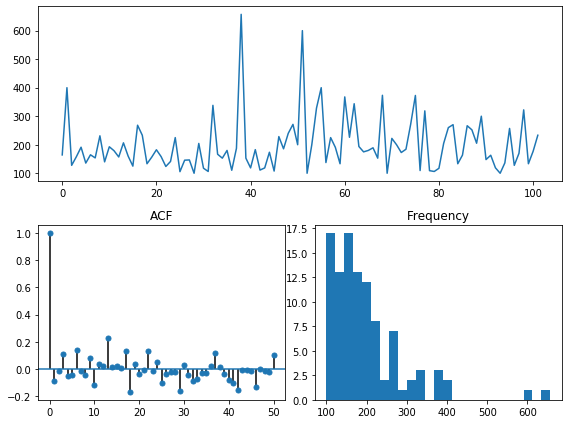

In [8]:
tsdisplay(y_train17, lag_max=50)

# The model will now be fitted.

In [9]:
fit17 = pm.auto_arima(y_train17, m=52, trace=True, supress_warnings=True)
fit17.summary()

Performing stepwise search to minimize aic


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,0,2)x(1,0,1,52) [intercept=True]; AIC=1226.990, BIC=1247.989, Time=10.615 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=True]; AIC=1221.552, BIC=1226.802, Time=0.015 seconds
Fit ARIMA(1,0,0)x(1,0,0,52) [intercept=True]; AIC=1224.692, BIC=1235.192, Time=1.277 seconds


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(0,0,1)x(0,0,1,52) [intercept=True]; AIC=1224.386, BIC=1234.886, Time=1.348 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=False]; AIC=1391.807, BIC=1394.432, Time=0.010 seconds
Fit ARIMA(0,0,0)x(1,0,0,52) [intercept=True]; AIC=1223.097, BIC=1230.972, Time=2.137 seconds


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(0,0,0)x(0,0,1,52) [intercept=True]; AIC=1223.097, BIC=1230.972, Time=1.026 seconds


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(0,0,0)x(1,0,1,52) [intercept=True]; AIC=1225.097, BIC=1235.597, Time=2.054 seconds
Fit ARIMA(1,0,0)x(0,0,0,52) [intercept=True]; AIC=1222.816, BIC=1230.691, Time=0.090 seconds
Fit ARIMA(0,0,1)x(0,0,0,52) [intercept=True]; AIC=1222.801, BIC=1230.676, Time=0.102 seconds
Fit ARIMA(1,0,1)x(0,0,0,52) [intercept=True]; AIC=1224.822, BIC=1235.322, Time=0.082 seconds
Total fit time: 18.798 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:                        SARIMAX   Log Likelihood                -608.776
Date:                Fri, 31 Jul 2020   AIC                           1221.552
Time:                        10:55:27   BIC                           1226.802
Sample:                             0   HQIC                          1223.678
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    198.6830     14.094     14.097      0.000     171.058     226.308
sigma2      8945.5498    902.936      9.907      0.000    7175.828    1.07e+04
===================================================================================
Ljung-Box (Q):                       35.03   Jarque-Bera (JB):               274.63
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             2.21
Prob(H) (two-sided):                  0.36   Kurtosis:                         9.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# The predictions will now be calculated.

In [10]:
prediction1 = pd.DataFrame(fit17.predict(n_periods = 3),index=y_test17.index)
prediction1.columns = ['Predicted_Quantity']
prediction1

,Predicted_Quantity
Week_Start,
2020-06-14,198.683041
2020-06-21,198.683041
2020-06-28,198.683041


# R squared and Mean Absolute Error Calculations

In [11]:
#find r squared and mean absolute error

#https://discuss.analyticsvidhya.com/t/getting-p-value-r-squared-and-adjusted-r-squared-value-in-python/31528
from sklearn.metrics import r2_score
print("Fit1 r2_score",r2_score(y_test17,prediction1))

#https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test17,prediction1)
print('Fit1 MAE: %f' % mae)

Fit1 r2_score -0.01102981931702951
Fit1 MAE: 83.112212


# Plot of training set, test set and forecast

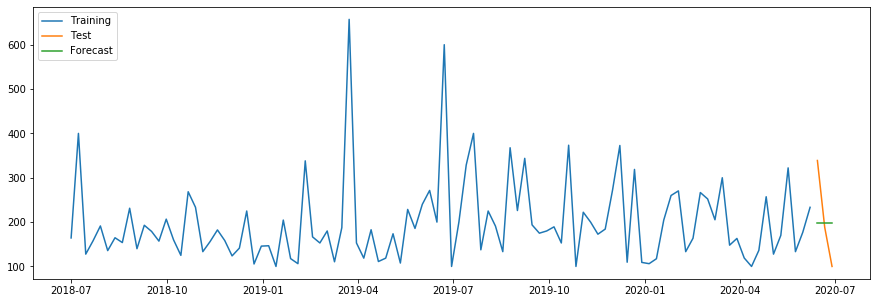

In [12]:
#Plot training, test, forecast
plt.figure(figsize=(15,5))
plt.plot(y_train17,label='Training')
plt.plot(y_test17,label='Test')
plt.plot(prediction1,label='Forecast')
plt.legend(loc='upper left')
plt.show()



# Residual Plot

In [13]:
#histogram of residuals
df17res = pd.merge(y_test17, prediction1, left_index=True, right_index=True)
print(df17res)

                    17  Predicted_Quantity
Week_Start                                
2020-06-14  338.888889          198.683041
2020-06-21  188.235294          198.683041
2020-06-28  100.000000          198.683041


In [14]:
df17res['residual'] = df17res['17'] - df17res['Predicted_Quantity']
print(df17res)

                    17  Predicted_Quantity    residual
Week_Start                                            
2020-06-14  338.888889          198.683041  140.205848
2020-06-21  188.235294          198.683041  -10.447747
2020-06-28  100.000000          198.683041  -98.683041


<Figure size 576x360 with 0 Axes>

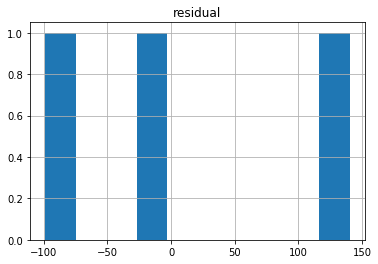

In [15]:
plt.figure(figsize=(8,5))
df17res.hist(column='residual')
plt.show()

## The data is skewed, so Log Transformation and Box-Cox transformation will be done to see which better transforms the data toward a normal distribution. Box-Cox is a power transformation and is used to stablize the variance and make the data more normally distributed.


 Log Transformation 



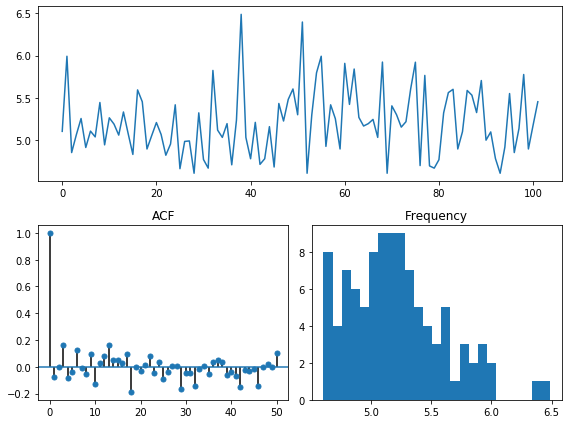

In [16]:
#Log transformation

from pmdarima.preprocessing import LogEndogTransformer

y_train_log, _ = LogEndogTransformer(lmbda=1e-6).fit_transform(y_train17)
print('\n Log Transformation \n')
tsdisplay(y_train_log, lag_max=50)


 Box-Cox Transformation 



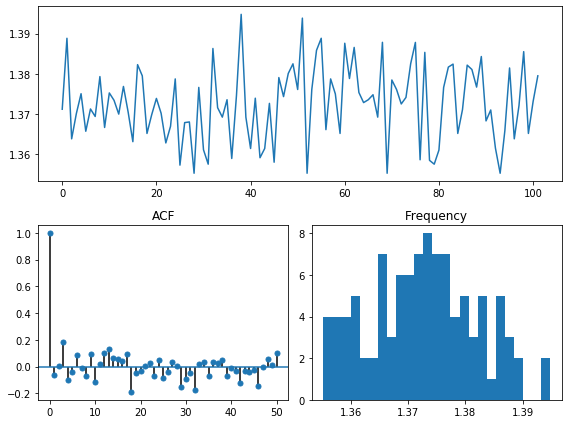

In [17]:
#Box-Cox transformation

from pmdarima.preprocessing import BoxCoxEndogTransformer

y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train17)
print('\n Box-Cox Transformation \n')
tsdisplay(y_train_bc, lag_max=50)

## Box-Cox does a better job of transforming the data. Therefore, the model will be refit using this transformation.

In [18]:
from pmdarima.pipeline import Pipeline

fit17_2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=52))
])

fit17_2.fit(y_train17)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,0,1,52) [intercept=True]; AIC=-648.940, BIC=-627.940, Time=3.329 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=True]; AIC=-660.508, BIC=-655.258, Time=0.058 seconds
Fit ARIMA(1,0,0)x(1,0,0,52) [intercept=True]; AIC=-656.899, BIC=-646.399, Time=2.314 seconds
Fit ARIMA(0,0,1)x(0,0,1,52) [intercept=True]; AIC=-657.228, BIC=-646.728, Time=5.690 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=False]; AIC=356.074, BIC=358.699, Time=0.013 seconds
Fit ARIMA(0,0,0)x(1,0,0,52) [intercept=True]; AIC=-658.508, BIC=-650.633, Time=1.555 seconds
Fit ARIMA(0,0,0)x(0,0,1,52) [intercept=True]; AIC=-658.508, BIC=-650.633, Time=0.565 seconds
Fit ARIMA(0,0,0)x(1,0,1,52) [intercept=True]; AIC=-656.508, BIC=-646.008, Time=1.976 seconds
Fit ARIMA(1,0,0)x(0,0,0,52) [intercept=True]; AIC=-658.899, BIC=-651.024, Time=0.108 seconds
Fit ARIMA(0,0,1)x(0,0,0,52) [intercept=True]; AIC=-658.890, BIC=-651.015, Time=0.147 seconds
Fit ARIMA(1,0,1)x(0,0,0,52) 

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='trace',
                           information_criterion='aic', m=52, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [19]:
fit17_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  102
Model:                        SARIMAX   Log Likelihood                 332.254
Date:                Fri, 31 Jul 2020   AIC                           -660.508
Time:                        10:55:45   BIC                           -655.258
Sample:                             0   HQIC                          -658.382
                                - 102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3726      0.001   1486.923      0.000       1.371       1.374
sigma2      8.673e-05   1.45e-05      5.984      0.000    5.83e-05       0.000
===================================================================================
Ljung-Box (Q):                       33.94   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.74   Prob(JB):                         0.46
Heteroskedasticity (H):               1.55   Skew:                             0.05
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## The AIC is significantly lower. The next step will be to examine the forecast using this model.

In [20]:
prediction2 = pd.DataFrame(fit17_2.predict(n_periods = 3),index=y_test17.index)
prediction2.columns = ['Predicted_Quantity']
prediction2

,Predicted_Quantity
Week_Start,
2020-06-14,173.237237
2020-06-21,173.237237
2020-06-28,173.237237


# R squared and Mean Absolute Error calculations

In [21]:
#find r squared and mean absolute error

print("Fit2 r2_score",r2_score(y_test17,prediction2))

mae2 = mean_absolute_error(y_test17,prediction2)
print('Fit2 MAE: %f' % mae2)

Fit2 r2_score -0.13178133125448865
Fit2 MAE: 84.628982


In [22]:
#calculate rmse and mape

mse = sklearn.metrics.mean_squared_error(y_test17,prediction2)
rmse = math.sqrt(mse)
print('RSME = ',rmse)


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    print('\n MAPE =')
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test17,prediction2)

RSME =  104.927124405652

 MAPE =


43.361923402886845

# Plot of training set, test set and forecast

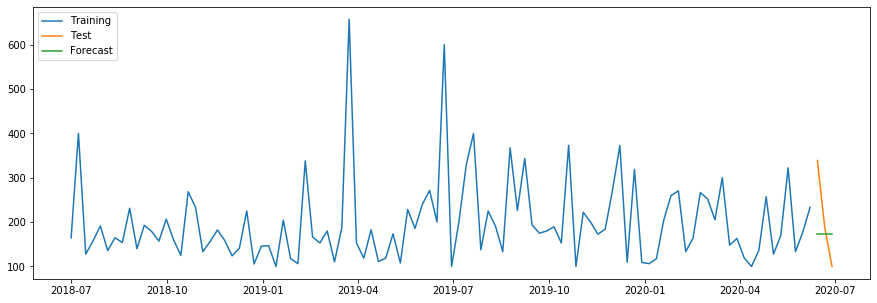

In [23]:
#Plot training, test, forecast
plt.figure(figsize=(15,5))
plt.plot(y_train17,label='Training')
plt.plot(y_test17,label='Test')
plt.plot(prediction2,label='Forecast')
plt.legend(loc='upper left')
plt.show()

# Residual Plot

In [24]:
#histogram of residuals
df17res2 = pd.merge(y_test17, prediction2, left_index=True, right_index=True)
print(df17res2)

                    17  Predicted_Quantity
Week_Start                                
2020-06-14  338.888889          173.237237
2020-06-21  188.235294          173.237237
2020-06-28  100.000000          173.237237


In [25]:
df17res2['residual'] = df17res2['17'] - df17res2['Predicted_Quantity']
print(df17res2)

                    17  Predicted_Quantity    residual
Week_Start                                            
2020-06-14  338.888889          173.237237  165.651652
2020-06-21  188.235294          173.237237   14.998057
2020-06-28  100.000000          173.237237  -73.237237


<Figure size 576x360 with 0 Axes>

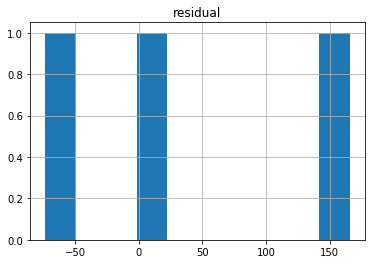

In [26]:
plt.figure(figsize=(8,5))
df17res2.hist(column='residual')
plt.show()

## Now Item 130173 will be fitted using the Auto Arima model above.

In [27]:
df130173 = df['130173']
print(df130173)

Week_Start
2018-07-01    79.000000
2018-07-08    77.173913
2018-07-15    92.156863
2018-07-22    75.000000
2018-07-29    68.367347
                ...    
2020-05-31    76.666667
2020-06-07    70.535714
2020-06-14    70.175439
2020-06-21    75.510204
2020-06-28    50.000000
Name: 130173, Length: 105, dtype: float64


In [28]:
y_train130173, y_test130173 = train_test_split(df130173, train_size=train_len)
print(y_train130173)

Week_Start
2018-07-01    79.000000
2018-07-08    77.173913
2018-07-15    92.156863
2018-07-22    75.000000
2018-07-29    68.367347
                ...    
2020-05-10    75.609756
2020-05-17    74.468085
2020-05-24    63.492063
2020-05-31    76.666667
2020-06-07    70.535714
Name: 130173, Length: 102, dtype: float64


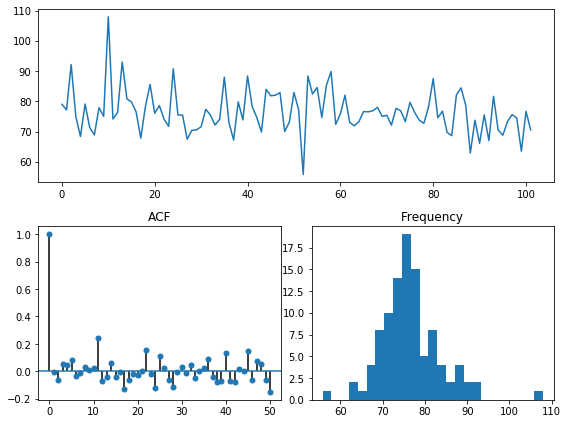

In [29]:
tsdisplay(y_train130173, lag_max=50)

In [30]:
fit130173 = pm.auto_arima(y_train130173, m=52, trace=True, supress_warnings=True)
fit130173.summary()

Performing stepwise search to minimize aic


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,0,1,52) [intercept=True]; AIC=697.094, BIC=718.015, Time=9.540 seconds
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=True]; AIC=757.807, BIC=763.037, Time=0.021 seconds
Fit ARIMA(1,1,0)x(1,0,0,52) [intercept=True]; AIC=737.089, BIC=747.549, Time=1.088 seconds


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(0,1,1)x(0,0,1,52) [intercept=True]; AIC=691.013, BIC=701.473, Time=3.677 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=False]; AIC=755.814, BIC=758.429, Time=0.017 seconds


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(2,1,2)x(0,0,1,52) [intercept=True]; AIC=695.108, BIC=713.414, Time=6.825 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,2)x(1,0,0,52) [intercept=True]; AIC=695.112, BIC=713.418, Time=7.033 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,0,1,52) [intercept=True]; AIC=698.965, BIC=722.501, Time=45.302 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,0,2,52) [intercept=True]; AIC=699.038, BIC=722.574, Time=37.890 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 2, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA(2,1,2)x(0,0,0,52) [intercept=True]; AIC=694.263, BIC=709.954, Time=0.439 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(0,0,2,52) [intercept=True]; AIC=697.052, BIC=717.973, Time=30.773 seconds
Near non-invertible roots for order (2, 1, 2)(0, 0, 2, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,0,0,52) [intercept=True]; AIC=696.957, BIC=717.878, Time=35.274 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(2,0,2,52) [intercept=True]; AIC=700.984, BIC=727.135, Time=43.755 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 2, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,2)x(1,0,1,52) [intercept=True]; AIC=695.505, BIC=713.811, Time=7.526 seconds
Near non-invertible roots for order (1, 1, 2)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,1)x(1,0,1,52) [intercept=True]; AIC=694.549, BIC=712.855, Time=8.006 seconds
Near non-invertible roots for order (2, 1, 1)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,2)x(1,0,1,52) [intercept=True]; AIC=697.440, BIC=720.976, Time=9.595 seconds
Near non-invertible roots for order (3, 1, 2)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,3)x(1,0,1,52) [intercept=True]; AIC=698.338, BIC=721.874, Time=12.131 seconds
Near non-invertible roots for order (2, 1, 3)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(1,1,1)x(1,0,1,52) [intercept=True]; AIC=694.878, BIC=710.569, Time=6.314 seconds
Near non-invertible roots for order (1, 1, 1)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,3)x(1,0,1,52) [intercept=True]; AIC=696.795, BIC=717.716, Time=9.418 seconds
Near non-invertible roots for order (1, 1, 3)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Fit ARIMA(3,1,1)x(1,0,1,52) [intercept=True]; AIC=696.549, BIC=717.469, Time=7.078 seconds
Near non-invertible roots for order (3, 1, 1)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)


C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\82643\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(3,1,3)x(1,0,1,52) [intercept=True]; AIC=699.460, BIC=725.611, Time=12.410 seconds
Near non-invertible roots for order (3, 1, 3)(1, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 294.244 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  102
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 52)   Log Likelihood                -341.506
Date:                            Fri, 31 Jul 2020   AIC                            691.013
Time:                                    11:00:40   BIC                            701.473
Sample:                                         0   HQIC                           695.247
                                            - 102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0553      0.038     -1.469      0.142      -0.129       0.018
ma.L1         -0.9999     21.747     -0.046      0.963     -43.622      41.623
ma.S.L52      -0.1253      0.232     -0.540      0.589      -0.580       0.329
sigma2        47.9267   1043.166      0.046      0.963   -1996.640    2092.494
===================================================================================
Ljung-Box (Q):                       34.92   Jarque-Bera (JB):                40.53
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             0.79
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
prediction130173_1 = pd.DataFrame(fit130173.predict(n_periods = 3),index=y_test130173.index)
prediction130173_1.columns = ['Predicted_Quantity']
prediction130173_1

,Predicted_Quantity
Week_Start,
2020-06-14,72.844240
2020-06-21,73.479548
2020-06-28,76.113295


In [32]:
#find r squared and mean absolute error

print("Fit130173_1 r2_score",r2_score(y_test130173,prediction130173_1))

mae = mean_absolute_error(y_test130173,prediction130173_1)
print('Fit130173_1 MAE: %f' % mae)

Fit130173_1 r2_score -0.9142886504174674
Fit130173_1 MAE: 10.270918


In [33]:
#calculate rmse and mape

mse = sklearn.metrics.mean_squared_error(y_test130173,prediction130173_1)
rmse = math.sqrt(mse)
print('RSME = ',rmse)


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    print('\n MAPE =')
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test130173,prediction130173_1)

RSME =  15.200331553623178

 MAPE =


18.76283817307373

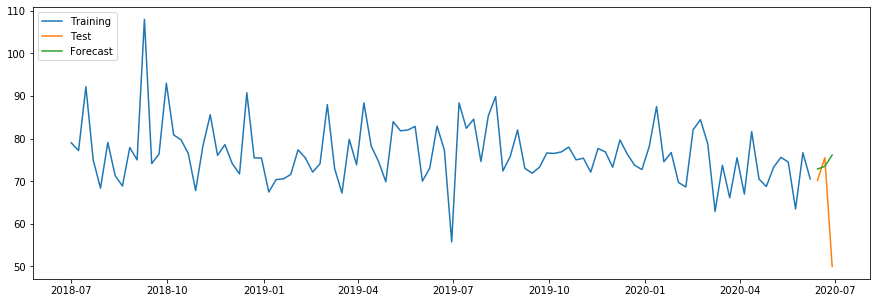

In [34]:
#Plot training, test, forecast
plt.figure(figsize=(15,5))
plt.plot(y_train130173,label='Training')
plt.plot(y_test130173,label='Test')
plt.plot(prediction130173_1,label='Forecast')
plt.legend(loc='upper left')
plt.show()

In [35]:
#histogram of residuals
df130173res = pd.merge(y_test130173, prediction130173_1, left_index=True, right_index=True)
print(df130173res)

               130173  Predicted_Quantity
Week_Start                               
2020-06-14  70.175439           72.844240
2020-06-21  75.510204           73.479548
2020-06-28  50.000000           76.113295


In [36]:
df130173res['residual'] = df130173res['130173'] - df130173res['Predicted_Quantity']
print(df130173res)

               130173  Predicted_Quantity   residual
Week_Start                                          
2020-06-14  70.175439           72.844240  -2.668801
2020-06-21  75.510204           73.479548   2.030657
2020-06-28  50.000000           76.113295 -26.113295


<Figure size 576x360 with 0 Axes>

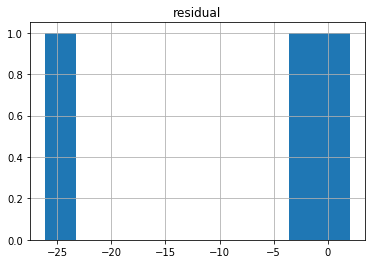

In [37]:
plt.figure(figsize=(8,5))
df130173res.hist(column='residual')
plt.show()